# Data mining Class 660 Challenge

* Name: Kale Aniket Devidas
* Class: Data Mining
* Email: ak665246@sju.edu    
* Prof: Joseph Davis    

In [3]:
# Import all libraries for to plot and load the datasets.
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
data = pd.read_csv("conversion_data.csv")

In [4]:
# shape of our data rows* cols
data.shape

(316200, 6)

In [3]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [4]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
data.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

* So we have total numbers of converted(10200) and non converted sessions(306000)

In [7]:
# This is good news for us. we dont have any missing values in datasets.
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [8]:
data.corr()["converted"]

age                   -0.088797
new_user              -0.152374
total_pages_visited    0.528994
converted              1.000000
Name: converted, dtype: float64

* As per the correlation Test: total_pages_visited more significant to the output.

In [9]:
data.country.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

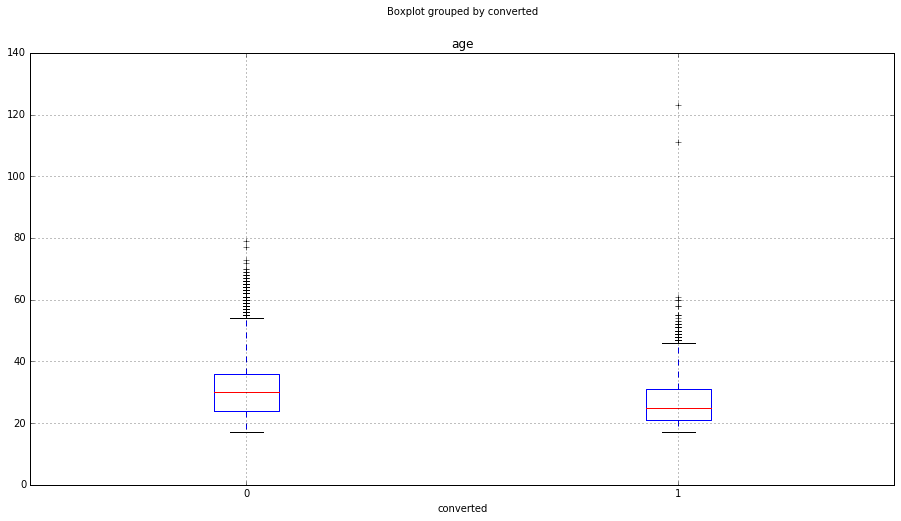

In [10]:
data.boxplot(column = "age", by = "converted", figsize=(15,8))

* We can see the distrubution of Age interms of conversion rate.
* if we see most of the converted age group in between 20 to 40. No conversion in between Age 60 to 80 

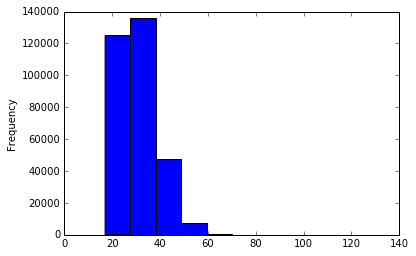

In [7]:
# distrubution of Age. Most of the peoples age in between 20 to 40 Years.
data.age.plot(kind = "hist")

In [16]:
# Number of Age values and count
data.age.value_counts(sort = False)

17      7597
18      8466
19      9349
20     10156
21     10966
22     11701
23     12336
24     12960
25     13460
26     13931
27     14084
28     14341
29     14158
30     14346
31     13692
32     13507
33     12631
34     12108
35     11471
36     10779
37      9761
38      8970
39      8202
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
72         1
73         1
77         1
79         1
111        1
123        1
Name: age, dtype: int64

In [12]:
# Null Accuaracy:
data.converted.value_counts().head(1)/data.converted.shape

0    0.967742
Name: converted, dtype: float64

* our modul predicts 96 percent the non converted values. 
* our bench mark or null accuracy is close to 96 percent.

# we will split Train and Test datasets.

* We will declare feature columns X and y

In [13]:
feat_cols = ["age", "new_user", "total_pages_visited"]

In [14]:
X = data[feat_cols]
y = data.converted

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(y_test.shape)

(237150, 3)
(79050,)


In [16]:
# We will used classification module
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
y_pred = knn.predict(X_test)

In [18]:
metrics.accuracy_score(y_test, y_pred)

0.98318785578747625

In [19]:
metrics.confusion_matrix(y_test, y_pred)

array([[76038,   462],
       [  867,  1683]])

In [20]:
score = cross_val_score(knn,X_train, y_train, cv = 5, scoring= "accuracy").mean()
score

0.98356736242884257

# False positive 462 incorrectly classified as converted
# False Negative 867 incorrectly classified as non converted.
# True positive 1683 correctly classified as converted
# True Negative 76038 correctly classified as non converted

* Conclusion : Our biggest problem are 462 sessions we have predicted as converted 
* butactually its a non converted sessions


In [21]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [22]:
pred_prob = pd.DataFrame({"Pred_proba": y_pred_prob})

* So no used of predicted probability in our case. because our NULL accuracy is 96 percent
* Null Accuracy means most often class is (non conversion class 0).


In [23]:
data["five_more_pages"] = (data.total_pages_visited >= 5).astype(int)

In [24]:
data.head()  

,country,age,new_user,source,total_pages_visited,converted,five_more_pages
0,UK,25,1,Ads,1,0,0
1,US,23,1,Seo,5,0,1
2,US,28,1,Seo,4,0,0
3,China,39,1,Seo,5,0,1
4,US,30,1,Seo,6,0,1


In [25]:
feat_cols = ["age", "new_user", "total_pages_visited", "five_more_pages"]
X = data[feat_cols]
y = data.converted

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(y_test.shape)

(237150, 4)
(79050,)


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
y_pred_class = knn.predict(X_test)

In [29]:
metrics.accuracy_score(y_test,y_pred_class)

0.98318785578747625

#  Tuning our Parameters.

In [30]:
k_range = list(range(1,31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [31]:
from sklearn.grid_search import RandomizedSearchCV
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights = weight_options)

In [32]:
# Why we have used time function to determine the time for iteration
# first start with 1 iteration then measure time then go for more iteration.
rand = RandomizedSearchCV(knn, param_dist, n_iter = 10, cv = 5, scoring = "accuracy", random_state=1)
% time rand.fit(X,y)

CPU times: user 4min 53s, sys: 3.33 s, total: 4min 57s
Wall time: 4min 59s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring='accuracy', verbose=0)

In [33]:
rand.grid_scores_

[mean: 0.98444, std: 0.00043, params: {'weights': 'distance', 'n_neighbors': 19},
 mean: 0.98453, std: 0.00027, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.98369, std: 0.00061, params: {'weights': 'uniform', 'n_neighbors': 7},
 mean: 0.98338, std: 0.00048, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.98330, std: 0.00052, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.98363, std: 0.00046, params: {'weights': 'distance', 'n_neighbors': 6},
 mean: 0.98242, std: 0.00050, params: {'weights': 'distance', 'n_neighbors': 3},
 mean: 0.98387, std: 0.00045, params: {'weights': 'distance', 'n_neighbors': 8},
 mean: 0.97429, std: 0.00232, params: {'weights': 'uniform', 'n_neighbors': 1},
 mean: 0.98404, std: 0.00041, params: {'weights': 'uniform', 'n_neighbors': 9}]

In [34]:
print(rand.best_estimator_)
print(rand.best_params_)
print(rand.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='distance')
{'weights': 'distance', 'n_neighbors': 22}
0.984528779254


* we have used Randomserach to tuning the parameters and we came to conclusion 
* Above parameters are giving us best module and parameters.
* our Accuracy is now 98.45 %. earlier it was 98.38

* Conclusion:
* Our Null Accuracy(Most often class) = 96 Percent that means our Module should have to get more than this accuracy.
* 462 sessions are False positives, we have to reduce this sessions number.
* As per boxplot, we dont have any conversion from age group 60-80 Years.
* Knn module our accuracy is 98.45 after tuning.

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
y_pred_class =  nb.predict(X_test)

In [37]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[74801,  1699],
       [  511,  2039]])

* We are interested in FP only 1699. we want to reduce 1699 sessions.
* False Positive Rate 1699

In [38]:
metrics.accuracy_score(y_test,y_pred_class)

0.97204301075268817

* Our Accuracy went down with this Module.

In [39]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
metrics.accuracy_score(y_test, y_pred_class)

0.97204301075268817

In [41]:
metrics.confusion_matrix(y_test, y_pred)

array([[76038,   462],
       [  867,  1683]])

In [42]:
# give you the predicted probabilities of each class.
print(log.predict_proba(X_test)[0:10,:])

[[  9.99825127e-01   1.74872829e-04]
 [  9.27653436e-01   7.23465638e-02]
 [  9.99775897e-01   2.24102818e-04]
 [  9.99671763e-01   3.28237310e-04]
 [  9.97657348e-01   2.34265151e-03]
 [  9.99988602e-01   1.13979263e-05]
 [  9.98800906e-01   1.19909427e-03]
 [  9.99918494e-01   8.15062963e-05]
 [  9.97038051e-01   2.96194851e-03]
 [  9.99298753e-01   7.01246747e-04]]


* Our Accuracy went down from 98 Percent to 97 

# Conclusion:
* Naive Bayes module Accuracy is 97 percent but the False postive rate is higher (1699) than other modules.
* our best Module Kmeans classification with n = 5, our Accuracy is 98 Percent.
* Logistic regreesion Module Accuracy is 97 Percent and False Positive rate is 420 same as Knn.
* so If we considered the False Postive rate and Accuracy, we are going to select Knn Module.